Попробуем следующий датасет для кластеризации

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, OPTICS

In [47]:
df = pd.read_csv('D:\Python\GB\CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Небольшое описание признаков(если честно перевод загуглил, некоторые признаки несовсем понимаю что обозначают)

In [48]:
print('CUSTID : Идентификационный номер владельца\n'
      'BALANCE : Сумма остатка, оставшаяся на их счете для совершения покупок\n'
      'BALANCE_FREQUENCY : Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)\n'
      'PURCHASES : Стоимость покупок, совершенных со счета\nONEOFF_PURCHASES : Максимальная сумма покупки, за один раз\n'
      'INSTALLMENTS_PURCHASES : Сумма покупки в рассрочку\n'
      'CASH_ADVANCE : Авансовый платеж наличными, предоставленный пользователем\n'
      'PURCHASES_FREQUENCY : Как часто совершаются покупки, оценка от 0 до 1 (1 = часто приобретаемые, 0 = не часто приобретаемые)\n'
      'ONEOFF_PURCHASES_FREQUENCY : Как часто совершаются единоразовые крупные покупки (1 = часто приобретаемые, 0 = не часто приобретаемые)\n'
      'PURCHASES_INSTALLMENTS_FREQUENCY :Как часто совершаются покупки в рассрочку (1 = часто совершается, 0 = не часто совершается)\n'
      'CASH_ADVANCE_FREQUENCY :  Как часто выплачиваются авансовые платежи наличными (1 = часто, 0 = не часто)\n'
      'CASH_ADVANCE_TRX : Количество транзакций, совершенных с помощью "Cash in Advanced"\n'
      'PURCHASES_TRX :  Количество совершенных транзакций покупки\n'
      'CREDIT_LIMIT : Лимит кредитной карты для пользователя\n'
      'PAYMENTS : Сумма платежа, произведенного пользователем\n'
      'MINIMUM_PAYMENTS : Минимальная сумма платежей, произведенных пользователем\n'
      'PRC_FULL_PAYMENT : Процент от полной оплаты, уплаченной пользователем\n'
      'TENURE : Срок действия услуги кредитной карты для пользователя')

CUSTID : Идентификационный номер владельца
BALANCE : Сумма остатка, оставшаяся на их счете для совершения покупок
BALANCE_FREQUENCY : Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)
PURCHASES : Стоимость покупок, совершенных со счета
ONEOFF_PURCHASES : Максимальная сумма покупки, за один раз
INSTALLMENTS_PURCHASES : Сумма покупки в рассрочку
CASH_ADVANCE : Авансовый платеж наличными, предоставленный пользователем
PURCHASES_FREQUENCY : Как часто совершаются покупки, оценка от 0 до 1 (1 = часто приобретаемые, 0 = не часто приобретаемые)
ONEOFF_PURCHASES_FREQUENCY : Как часто совершаются единоразовые крупные покупки (1 = часто приобретаемые, 0 = не часто приобретаемые)
PURCHASES_INSTALLMENTS_FREQUENCY :Как часто совершаются покупки в рассрочку (1 = часто совершается, 0 = не часто совершается)
CASH_ADVANCE_FREQUENCY :  Как часто выплачиваются авансовые платежи наличными (1 = часто, 0 = не часто)
CASH_ADVANCE_TRX : Количество транзакций, сове

Проведем небольшой EDA

In [49]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(0)
df['BALANCE_FREQUENCY'] = df['BALANCE_FREQUENCY'].round(decimals=0)
df['PURCHASES_FREQUENCY'] = df['PURCHASES_FREQUENCY'].round(decimals=0)
df['ONEOFF_PURCHASES_FREQUENCY'] = df['ONEOFF_PURCHASES_FREQUENCY'].round(decimals=0)
df['PURCHASES_INSTALLMENTS_FREQUENCY'] = df['PURCHASES_INSTALLMENTS_FREQUENCY'].round(decimals=0)
df['CASH_ADVANCE_FREQUENCY'] = df['CASH_ADVANCE_FREQUENCY'].round(decimals=0)
df.columns = df.columns.str.lower()
df.columns = df.columns

In [50]:
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,1.0,95.40,0.00,95.4,0.000000,0.0,0.0,0.0,0.0,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,1.0,0.00,0.00,0.0,6442.945483,0.0,0.0,0.0,0.0,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.0,773.17,773.17,0.0,0.000000,1.0,1.0,0.0,0.0,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1.0,1499.00,1499.00,0.0,205.788017,0.0,0.0,0.0,0.0,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.0,16.00,16.00,0.0,0.000000,0.0,0.0,0.0,0.0,0,1,1200.0,678.334763,244.791237,0.000000,12


Простите, вынужденно скопировал функцию, мало времени что-то самому придумывать

In [51]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                       c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                       alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()

In [52]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df.iloc[:, 1:])

In [84]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_norm)
columns = ['component_' + str(i) for i in range(1, 3)]
components_X_reduced = pd.DataFrame(X_reduced, columns=columns)

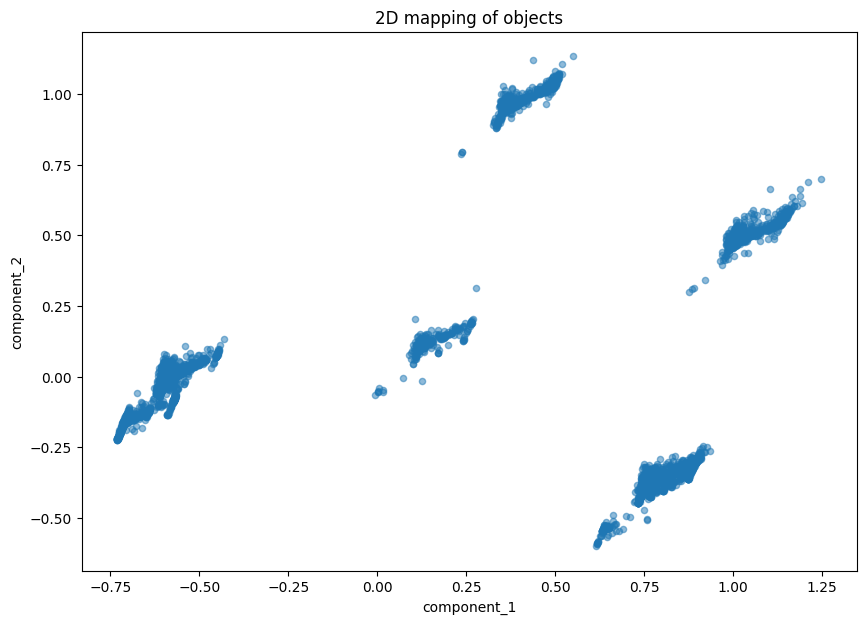

In [85]:
display_components_in_2D_space(components_X_reduced)

In [80]:
tsne = TSNE(random_state=5, perplexity=10)
X_tsne = tsne.fit_transform(df_norm)
components_X_tsne = pd.DataFrame(X_tsne, columns=columns)

C:\Users\shang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


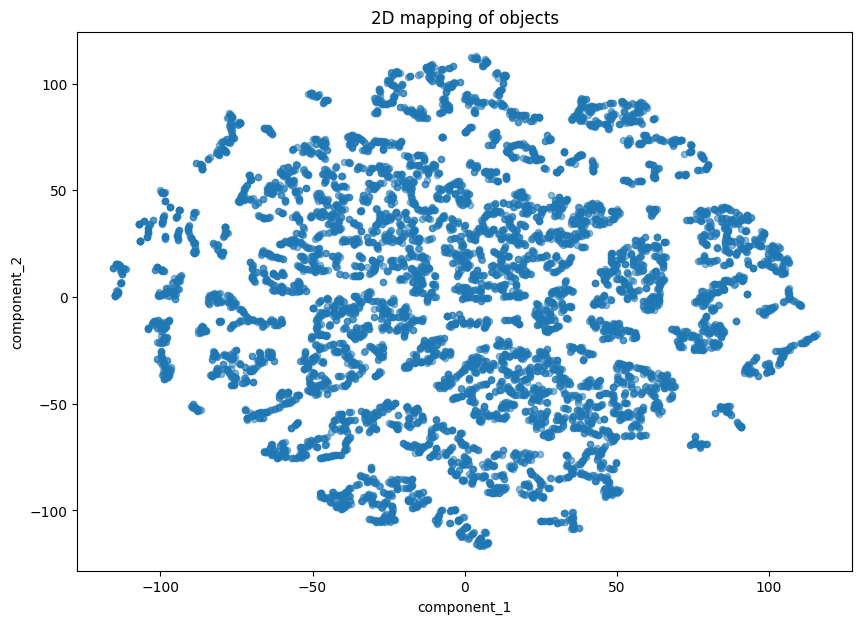

In [81]:
display_components_in_2D_space(components_X_tsne)

In [104]:
kmeans = KMeans(n_clusters=7, random_state=10)
clust = kmeans.fit_predict(df_norm)
clust = pd.Series(clust, name='clasters')

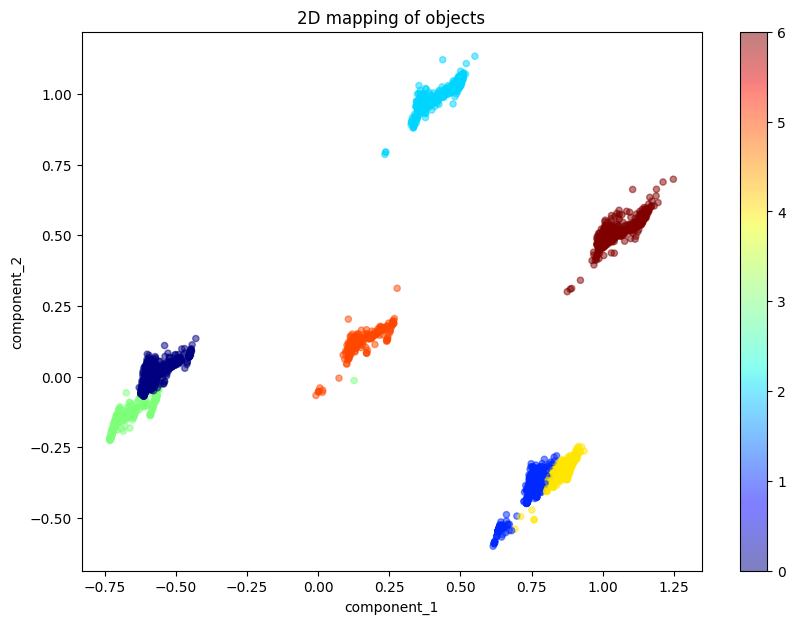

In [105]:
display_components_in_2D_space(components_X_reduced, labels=clust)

На всякий случай глянем не потеряли ли мы какие-либо объекты

In [106]:
sum = 0
for e in range(0,8):
    a = df[clast == e].iloc[:, 1:]
    sum += a.shape[0]

In [107]:
print(sum)

8950


In [108]:
df.shape[0]

8950

Резюме: Модель понижения размерности(PCA) работет отлично. Видно примерно 5-6 кластеров. После обучения модели кластеризации видно, что оптимальное количество кластеров 7.
Все-таки, что такое TSNE? Если кто-то дойдет до этой записи, можете на пальцах объяснить, по документации не врубился)